<a href="https://colab.research.google.com/github/AbhishekSriva-git/DataScienceTraining/blob/PCAAdvertisment/pcaadvertismentdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the packages

# New Section

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import preprocessing
from sklearn.decomposition import PCA

read the data

In [ ]:
upload  = files.upload()

Saving advertising.csv to advertising.csv


read the data in the dataframe

In [ ]:
import io
data = pd.read_csv(io.BytesIO(upload['advertising.csv']))

investigate dataset

In [ ]:
data.shape

(1000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


identify the number of missing values

In [ ]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

identify outliers

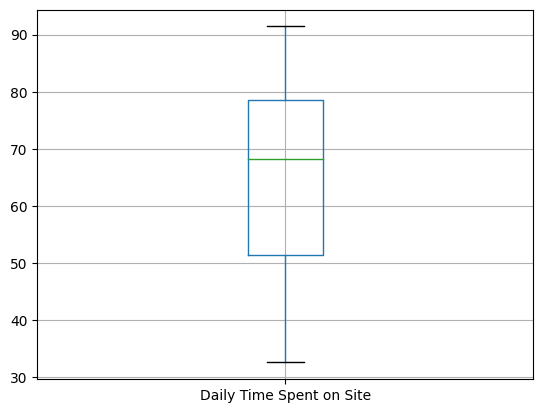

In [ ]:
data.boxplot(column=['Daily Time Spent on Site'])
plt.show()

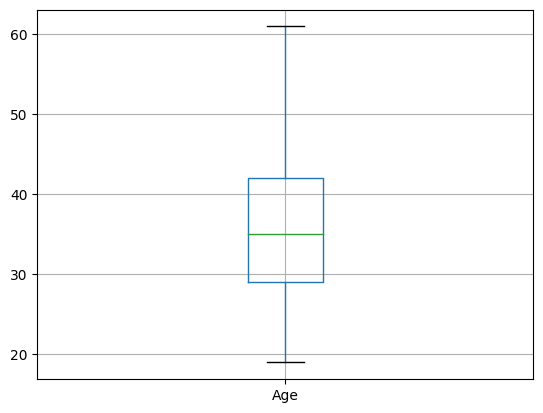

In [ ]:
data.boxplot(column=['Age'])
plt.show()

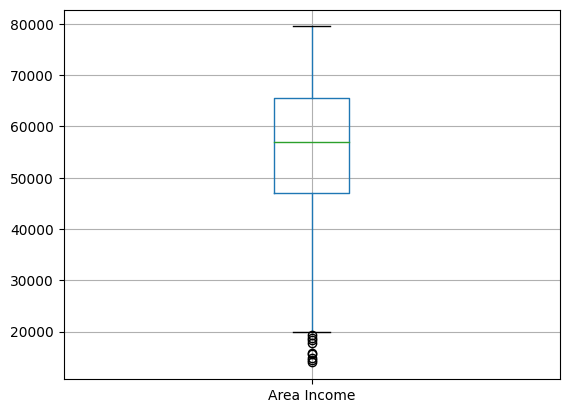

In [ ]:
data.boxplot(column=['Area Income'])
plt.show()

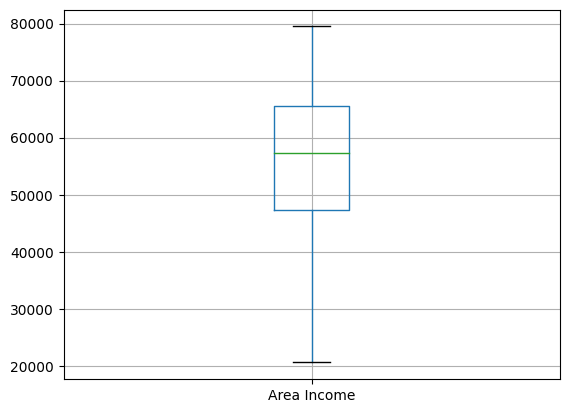

In [ ]:
data = data[data['Area Income'] > 20000]
data.boxplot(column=['Area Income'])
plt.show()

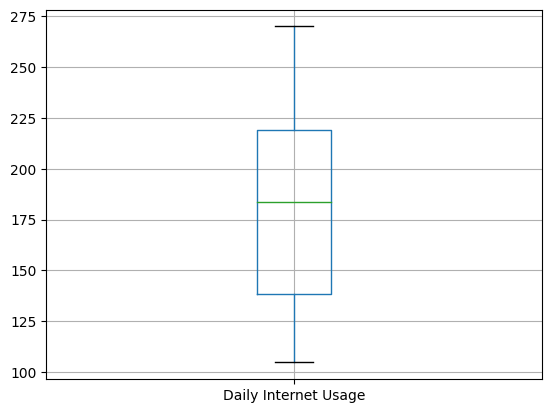

In [ ]:
data.boxplot(column=['Daily Internet Usage'])
plt.show()

Idenitfy number of unique values in each non numeric attribute

In [ ]:

le = preprocessing.LabelEncoder()

In [ ]:
data['Ad Topic Line'] = le.fit_transform(data['Ad Topic Line'])
data['City'] = le.fit_transform(data['City'])
data['Country'] = le.fit_transform(data['Country'])

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,90,951,0,215,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,460,894,1,147,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,561,111,0,184,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,894,930,1,103,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,760,796,0,96,2016-06-03 03:36:18,0


In [ ]:
data.City.unique()

array([951, 894, 111, 930, 796, 279,  46, 663, 875, 704, 869, 179, 898,
       598, 934, 534, 883, 699, 295, 463, 658, 400, 790, 609, 240, 645,
       892, 770, 608, 889, 622, 395, 591, 637, 528, 303, 864, 328,  78,
       459, 430, 957, 571,  37, 275, 354, 520, 298, 233, 874, 262, 605,
       171, 793,  12, 827, 213, 690, 657,  49, 348, 350, 761, 579, 724,
       282, 289,  40, 521, 589, 108, 509, 178, 939, 163, 180, 701, 100,
       366, 357, 174, 895, 356, 185, 754, 365, 576, 222, 530, 474,  85,
       689,  39, 937, 527, 950, 940, 942, 585,  30, 257, 954, 850, 744,
        42,  15, 431, 200, 266, 504, 457,  18, 515, 694, 862, 642, 624,
       462, 379, 424, 302, 807, 774, 817, 420,  51, 816, 603, 165, 652,
       828, 664, 229, 157, 415, 611,  23, 388, 119, 485, 925, 334, 676,
       916, 386, 249, 781, 832, 668, 307, 818, 182, 919,  90, 653, 638,
       703, 164, 877, 908, 851, 169, 103, 208, 831, 741, 788, 343, 587,
       775, 122, 147, 234, 273, 255, 311, 493, 176, 838, 955, 26

drop timestamp attribute

In [ ]:
data.drop(['Timestamp'],axis = 1,inplace=True)

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,90,951,0,215,0
1,80.23,31,68441.85,193.77,460,894,1,147,0
2,69.47,26,59785.94,236.50,561,111,0,184,0
3,74.15,29,54806.18,245.89,894,930,1,103,0
4,68.37,35,73889.99,225.58,760,796,0,96,0


Splitting dataset into training and test data

In [ ]:
Y = data['Clicked on Ad'].values
print(type(Y))
print(Y)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1
 

In [ ]:
X = data.iloc[:,0:8].values

In [ ]:
data.shape

(990, 9)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(660, 8)
(330, 8)
(660,)
(330,)


In [ ]:
# Applying PCA **

In [ ]:
pca =PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.98982841e-01 5.10882935e-04 4.64210545e-04]


In [ ]:
from sklearn import svm
prediction = svm.SVC()
prediction.fit(X_train,Y_train)

SVC()

In [ ]:
Y_predicted = prediction.predict(X_test)
print(Y_predicted)

[0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
accuracy = accuracy_score(Y_predicted,Y_test)
print(accuracy)

0.706060606060606


Training the Naive Bayes Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
prediction = DecisionTreeClassifier(criterion = 'entropy')
prediction.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

Testing Phase

In [ ]:
Y_predicted = prediction.predict(X_test)
print(Y_predicted)

[0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0
 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1]


Analyzing the performance of model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
accuracy = accuracy_score(Y_predicted,Y_test)
print(accuracy)

0.6151515151515151


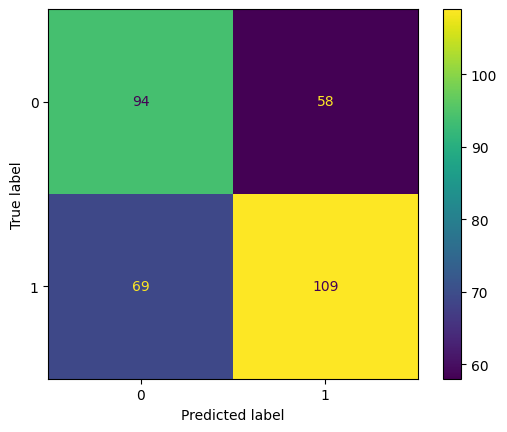

In [ ]:
cm = confusion_matrix(Y_test,Y_predicted)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()